## db description

## Table : users

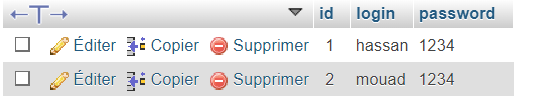

## Table : messages

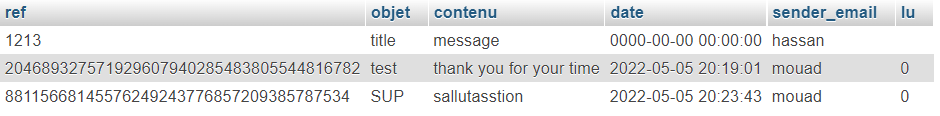

-la variable 'ref' est le id du mail envoyer.

-la variable 'objet' est le titre du mail.

-la variable 'contenu' est le contenu du mail (message).

-la variable 'sender_email' c'est la personne qui a envoyer le mail en question.

-la variable 'lu' c'est la personne qui a reçu le email soit l'a lut ou pas. 

## table : envoyer

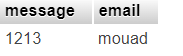

-la variable 'message' est le id du mail reçu.

-la variable 'email' est le login du user qui a reçu le mail.

connect with mysql server

In [1]:
#localhost server
import mysql.connector
#connexion au base de donnees
db = mysql.connector.connect(
  host = "localhost", 
  user = "root", 
  port="3306",
  password = "",
  database = "python", 
)


In [28]:

#online server
#import mysql.connector
#connexion au base de donnees
#db = mysql.connector.connect(
#  host = "sql4.freemysqlhosting.net",
#  user = "sql4489611",
#  port="3306",
#  password = "LCvC31nzag",
#  database = "sql4489611" 
#)
#please go => https://www.phpmyadmin.co/


## Class User
| Function | Role | parametres |
| --- | --- | --- |
| __init__ |  |  login,password |
| --- | --- | --- |
| get_password | return password | email |
| --- | --- | --- |
| set_password | change password | password |
| --- | --- | --- |
| connect | connect to db | - |
| --- | --- | --- |
| userIdentification | change password | email |
| --- | --- | --- |
| user_exist | check if the user exist in table users or not | email |
| --- | --- | --- |
| save | insert user into users table  | - |
| --- | --- | --- |
| change_password | change password | newPass |
| --- | --- | --- |
| dispaly_unread_messages | return all unread messages | - |
| --- | --- | --- |
| dispaly_all_messages | return all messages | - |
| --- | --- | --- |
| set_message_read | change the message status from Read=0 to Read=1 (lu) | ref |
| --- | --- | --- |
| str | print the actual user | -|

In [2]:
from mysql.connector import Error
import datetime

class User:
    def __init__(self, login, password):
        self.login = login
        self.__pass = password
    ######################################################################
    def get_login(self):
        return self.login
    ######################################################################
    def get_password(self, email):
        if self.login == email:
            return self.__pass
    def set_password(self, password):
        self.__pass = password
    ######################################################################
    
    def connect(self):
        self.conn = None
        try:
            self.conn = mysql.connector.connect(host='localhost',
                                           database='python',
                                           user='root',
                                           password='')
            if self.conn.is_connected():
                print('Connected to MySQL database')
        except Error as e:
            print(e)
        return self.conn
    ######################################################################
    def userIdentification(self, email):
        cursor = db.cursor()
        query="SELECT `login`, `password` FROM `users` WHERE `login`='{}'".format(email)
        cursor.execute(query)
        rows = cursor.fetchone()
        return rows
    #####################################################################
    #check if the user exisit in our database or not
    def user_exist(self, email):
        cursor = db.cursor()
        query="SELECT `login`, `password` FROM `users` WHERE `login`='{}'".format(email)
        cursor.execute(query)
        rows = cursor.fetchone()
        if rows:
            return 1
        else:
            return -1
    ######################################################################
    def save(self):
        conn = self.connect()
        cursor = conn.cursor()
        query = "INSERT INTO users (`login`, `password`) VALUES(%s, %s)"
        args = (self.get_login(), self.get_password(self.get_login()))
        cursor.execute(query, args)
        conn.commit()
        conn.close()
    #######################################################################
    def change_password(self, newPass):
        query = "UPDATE `users` SET `password`=%s WHERE `login`=%s"
        args = (newPass, self.get_login())
        conn = self.connect()
        cursor = conn.cursor()
        cursor.execute(query, args)
        conn.commit()
        conn.close()
        self.set_password(newPass)
        print("password changed successufuly")
    ########################################################################
    def delete(self):
        conn = self.connect()
        cursor = conn.cursor()
        query = "DELETE FROM `users` WHERE `login`='%s'"
        args = (self.get_login())
        cursor.execute(query, args)
        conn.commit()
        conn.close()
        print("user deleted successufuly")
    ##########################################################################
    def dispaly_unread_messages(self):
        cursor = db.cursor()
        query="SELECT * FROM `envoyer`, `messages` WHERE envoyer.email ='{}' and envoyer.message=messages.ref and messages.lu='0'".format(str(self.login))
        #args = (self.get_login())
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows
    ##########################################################################
    def display_all_messages(self): #all incoming messages
        cursor = db.cursor()
        query="SELECT * FROM `envoyer`, `messages` WHERE envoyer.email ='{}'".format(str(self.login))
        #args = (self.get_login())
        cursor.execute(query)
        rows = cursor.fetchall()
        return rows
    def set_message_read(self, ref):
        query = "UPDATE `messages` SET `lu`='1' WHERE `ref`={}".format(ref)
        args = (ref)
        conn = self.connect()
        cursor = conn.cursor()
        cursor.execute(query)
        conn.commit()
        conn.close()
        print("message read successufuly")
    ##########################################################################
    def __str__(self):
        return ("actual user : " + str(self.login))






## Class Message
| Function | Role | parametres |
| --- | --- | --- |
| __init__ |  | ref, objet, contenu, u |
| --- | --- | --- |
| get_msg_id | return the message ref | - |
| --- | --- | --- |
| connect | connect to db | - |
| --- | --- | --- |
| save | insert the message into db | - |
| --- | --- | --- |

In [3]:

class Message():
    def __init__(self, ref, objet, contenu, u):#db elements : ref, objet, contenu, date, user_id_or_mail !!
        self.ref = ref
        self.objet = objet
        self.contenu = contenu
        self.__date = datetime.datetime.now()
        self.__u = u
    #####################################################################
    def get_msg_id(self):
        return str(self.ref)
    #####################################################################
    def __str__(self):
        return ("titre : " + str(self.objet) + "\n" + "content : " +str(self.contenu) + "\n" + "date :" +str(self.__date) + "\n" + self.__u.get_login())
    ######################################################################
    def connect(self):
        self.conn = None
        try:
            self.conn = mysql.connector.connect(host='localhost',
                                           database='python',
                                           user='root',
                                           password='')
            if self.conn.is_connected():
                print('Connected to MySQL database')
        except Error as e:
            print(e)
        return self.conn
    ########################################################################
    def save(self):
        conn = self.connect()
        cursor = conn.cursor()
        query = "INSERT INTO `messages`(`ref`, `objet`, `contenu`, `date`, `sender_email`, `lu`) VALUES (%s, %s, %s, %s, %s, %s)"
        args = (self.get_msg_id(), self.objet, self.contenu, self.__date, self.__u.get_login(), '0')
        cursor.execute(query, args)
        conn.commit()
        conn.close()
    #######################################################################
        
    


## Class Envoyer
| Function | Role | parametres |
| --- | --- | --- |
| __init__ |  | r, m |
| --- | --- | --- |
| connect | connect to db | - |
| --- | --- | --- |
| save | insert the message ref and recipient email into db | - |
| --- | --- | --- |

In [4]:
class Envoyer():
    def __init__(self, r, m):
        self.__recipient = r
        self.__m = m
    #########################
    def connect(self):
        self.conn = None
        try:
            self.conn = mysql.connector.connect(host='localhost',
                                           database='python',
                                           user='root',
                                           password='')
            if self.conn.is_connected():
                print('Connected to MySQL database')
        except Error as e:
            print(e)
        return self.conn
    #################################
    def save(self):
        conn = self.connect()
        cursor = conn.cursor()
        query = "INSERT INTO `envoyer`(`message`, `email`) VALUES (%s, %s)"
        args = (self.__m.get_msg_id(), self.__recipient.get_login())
        cursor.execute(query, args)
        conn.commit()
        conn.close()
    def __str__(self):
        return "message send successfully"

In [5]:
# Fucntion to create new  user, the function will return 1 if user registed else 0
def createNewUser():
    print("please enter you email adress :")
    email = input()
    print("please enter your password")
    ps = input()
    print("confirm password")
    if input()==ps: #if the two passwords match then we will create new user with email and password
        u = User(email, ps)
        u.save() # insert the user into db
        print("your account registered successfuly")
        return 1
    else:
        print("passwords doesn't match!")
        return 0

    
#userAuth function
#the user will be able to create new account or login with his identification (email+password)

def userAuth():
    
    print("to create account please press 1, already have account please press 2")
    if int(input()) == 1: #create new account 
        while createNewUser()!=1:
            pass
    counter = 0
    while True: #log in 
        print("please enter your email adress : \n")
        email = input()
        u = User(email, '')
        password = u.userIdentification(email) #get the password from db using userIdentification() function
        #userIdentification is a fuction that returns tow values login=pa1sword[0] and password=password[1] 
        if(password): # if the password exist that means the user exist in our db, and we will ask the user to enter his password else the user is not exist 
            print("please enter your password\n")
            while True:
                if password[1] != input(): #check if the passwords match or not 
                    print("please try again")
                    counter = counter + 1
                    if counter == 5: 
                        print("you reached the max attempts")
                        return 0
                else:
                    print("Congratulation, You are logged in")
                    u.set_password(password) #we fill the password on the user "u" line 31 
                    return u
        else:
            print("the user is not exist, please try again")

#send message fucntion will take user and 
def send_message(u):
    if u != 0:# u the user who send the message 
        while True: # loop to make sure that the user enter correct information
            print("enter recipient email") # ask the user to enter recipient email
            recipient_email = input()
            r = User(recipient_email, '') 
            if r.user_exist(recipient_email) == -1:# check if recipient email exist or not 
                print("the user is not exist, Please try again!")
            else:
                break
    # once the user exist
    print("enter title of your message :") #ask the user to enter email title
    objet = input()
    print("please write your message here")#ask the user to enter email message
    contenu = input()
    m = Message(uuid.uuid1().int, objet, contenu, u) #declare new message class
    E = Envoyer(r, m)#declare new envoyer class
    print("############## message  #########################")
    print(m)
    m.save() # insert the message into our db
    print('############### envoyer ########################')
    print(E)
    E.save()# insert message ref and recipient email into envoyer table


import uuid # To generate id
################################# MAIN FUNCTION ###################################################################
def main():
    u = userAuth() # call user auth fucntion
    while True:
        print("#########################################################################")
        print("To send message please press 1:\nTo see all unread message please press 2:\nTo change password please press 3:\nTo see your messages status(positive/negative) please press 4:\nTo exit please press 5:\n")
        t = int(input())
        if t == 1:
            send_message(u)
        elif t ==2:
            results = u.dispaly_unread_messages() 
            print("you have {} unread messages".format(len(results))) # print all number of unread messages
            for res in results:
                print('message title : ', res[3]) # print the title of each message and give the user the possibility to read the whole message
                print("To read message please press 1:\n")
                if int(input()) == 1:
                    print("message ref = ", res[0])
                    print('message title : ', res[3])
                    print('message content :', res[4])
                    print('message date :', res[5])
                    print('from : ', res[6])
                    u.set_message_read(res[0]) #change the status of message from (lu = 0) to (lu = 1) res[0]=id_message
            print(u)
        elif t == 3: # change password
            while True:
                print("please enter you new password")
                ps = input()
                print("confirm password")
                if ps == input(): # if the passwords match 
                    u.change_password(ps) #change the password and update the new password in db
                    break
                else:
                    print("password incorrect, please try again!")
        elif t == 4:
            txt_analysis_opt1(u)
        elif t == 5:
            break


# Travail Optionnel 1 : implémenter un modèle NLP pour polariser le message (positif ou négatif) 

In [6]:
from pattern.en import sentiment
import nltk

#text analysis
def txt_analysis_opt1(u):
    results = u.display_all_messages()
    for res in results:
        score  = sentiment(res[4])#res[4] = objet of the mail receved.
                                  #use sentiment to know to state of the mail (Positive or negative).
        print('message content :', res[4])
        if score[0] > 0 and score[1] > 0.5:
            print("Positive message")
        elif score[0] < 0 and score[1] > 0.5:
            print("Negative message")
        else:
            print("Can't detect anything")
            
            



In [7]:
main()

to create account please press 1, already have account please press 2
2
please enter your email adress : 

1234
the user is not exist, please try again
please enter your email adress : 

mouad
please enter your password

1234
Congratulation, You are logged in
#########################################################################
To send message please press 1:
To see all unread message please press 2:
To change password please press 3:
To see your messages status(positive/negative) please press 4:
To exit please press 5:

1
enter recipient email
hassan
enter title of your message :
final test
please write your message here
this is the final test
############## message  #########################
titre : final test
content : this is the final test
date :2022-05-06 01:21:48.487803
mouad
Connected to MySQL database
############### envoyer ########################
message send successfully
Connected to MySQL database
#######################################################################

nous avons constaté que notre message inséré dans notre base de données


## table : messages
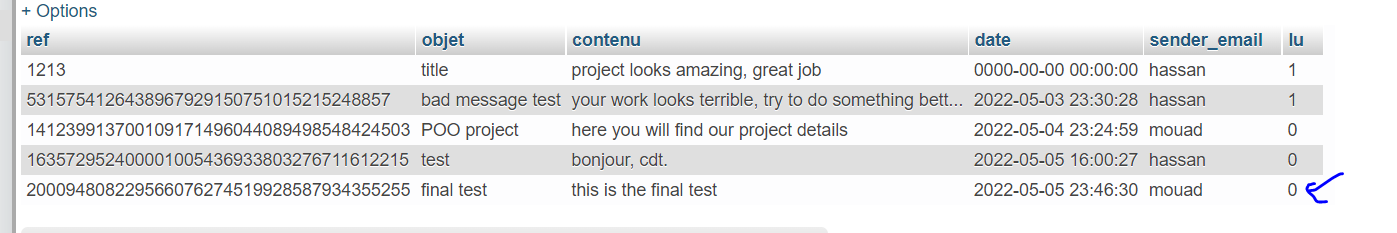

## table : envoyer
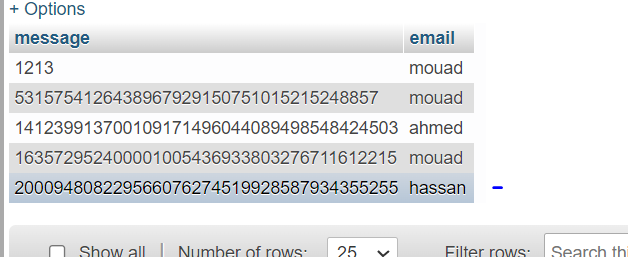


In [32]:
main()

to create account please press 1, already have account please press 2
2
please enter your email adress : 

hassan
please enter your password

1234
Congratulation, You are logged in
#########################################################################
To send message please press 1:
To see all unread message please press 2:
To change password please press 3:
To see your messages status(positive/negative) please press 4:
To exit please press 5:

2
you have 1 unread messages
message title :  final test
To read message please press 1:

1
message ref =  200094808229566076274519928587934355255
message title :  final test
message content : this is the final test
message date : 2022-05-05 23:46:30
from :  mouad
Connected to MySQL database
message read successufuly
actual user : hassan
#########################################################################
To send message please press 1:
To see all unread message please press 2:
To change password please press 3:
To see your messages stat